### <center>**Introducción al Análisis de Decisiones Semestre 2024-02**

**Ejemplo Taller 1. Estadística Descriptiva**

**Paso 1. Importar los paquetes requeridos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#La última línea permitirá que las gráficas se "incrusten" en el notebook.

# **Lectura de datos**

In [86]:
df=pd.read_csv("/content/Global_Music_Streaming_Listener_Preferences.csv")

df

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,U5995,60,UK,Deezer,Country,348,81,Post Malone,Premium,Morning,49.23,22.36
4996,U5996,38,Australia,Deezer,Hip-Hop,225,218,BTS,Premium,Night,17.08,58.23
4997,U5997,27,Brazil,Amazon Music,Metal,568,277,Taylor Swift,Premium,Night,69.39,51.71
4998,U5998,58,Canada,Amazon Music,EDM,523,492,Bad Bunny,Premium,Night,43.44,24.53


# **Punto 2**

In [ ]:
categorias = df['Top Genre'].nunique()
print(categorias)


iterar_categorias = df['Top Genre']

# Para conocer las variables de categorias se usa unique() sin la n
conocer_catergorias = iterar_categorias.unique()
print(conocer_catergorias)

10
['Reggae' 'Country' 'Pop' 'EDM' 'Classical' 'Metal' 'Rock' 'Hip-Hop' 'R&B'
 'Jazz']


In [ ]:
# como saber el numero de veces que aparece un genero en la columna

repeticiones_genero = iterar_categorias.value_counts()

print(repeticiones_genero)

Top Genre
Reggae       532
Jazz         532
EDM          528
Rock         516
R&B          495
Metal        491
Hip-Hop      485
Country      484
Classical    475
Pop          462
Name: count, dtype: int64


# **Punto 3 (Graficas Top Genre)**

Top Genre
Reggae       10.64
Jazz         10.64
EDM          10.56
Rock         10.32
R&B           9.90
Metal         9.82
Hip-Hop       9.70
Country       9.68
Classical     9.50
Pop           9.24
Name: count, dtype: float64


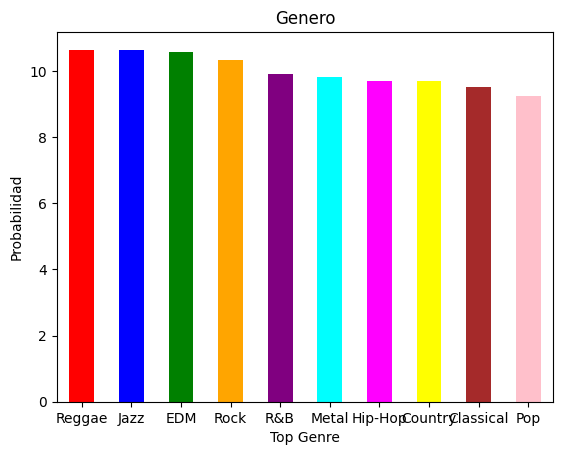

In [ ]:
probabilidad = (repeticiones_genero/5000)*100
print(probabilidad)
probabilidad.plot(kind="bar", color = [
    'red',
    'blue',
    'green',
    'orange',
    'purple',
    'cyan',
    'magenta',
    'yellow',
    'brown',
    'pink'
]
)

plt.ylabel('Probabilidad')
plt.title('Genero')
plt.xticks(rotation=0)
plt.show()

# **Punto 5 (Forma manual de calcular los datos)**

In [ ]:
df.columns = df.columns.str.strip()

# Deezer morning
morning_deezer = df[
    (df['Streaming Platform'] == 'Deezer') &
    (df['Listening Time (Morning/Afternoon/Night)'] == 'Morning')
]['Discover Weekly Engagement (%)'].mean()

# Dezzer afternoon
afternoon_deezer = df[
    (df['Streaming Platform'] == 'Deezer') &
    (df['Listening Time (Morning/Afternoon/Night)'] == 'Afternoon')
]['Discover Weekly Engagement (%)'].mean()

# Deezer night
night_deezer = df[
    (df['Streaming Platform'] == 'Deezer') &
    (df['Listening Time (Morning/Afternoon/Night)'] == 'Night')
]['Discover Weekly Engagement (%)'].mean()


data = {
    'Streaming Platform': ['Deezer'],
    'Morning': [round(morning_deezer, 2)],
    'Afternoon': [round(afternoon_deezer, 2)],
    'Night': [round(night_deezer, 2)]
}


table = pd.DataFrame(data)
table
#df_filtre

,Streaming Platform,Morning,Afternoon,Night
0,Deezer,48.85,50.26,51.37


# **Forma automatica (Funciones de pandas)**

In [ ]:
pivot_table = pd.pivot_table(
    df,
    values='Discover Weekly Engagement (%)',
    index='Streaming Platform',
    columns='Listening Time (Morning/Afternoon/Night)',
    aggfunc='mean',
    margins=True,
    margins_name='Total'
)

pivot_table = pivot_table[['Morning', 'Afternoon', 'Night', 'Total']]

pivot_table = pivot_table.round(2)

pivot_table.reset_index(inplace=True)

print(pivot_table.to_string(index=False))

Streaming Platform  Morning  Afternoon  Night  Total
      Amazon Music    51.37      50.46  47.76  49.87
       Apple Music    50.44      50.52  49.63  50.20
            Deezer    48.85      50.26  51.37  50.22
           Spotify    52.88      51.41  50.32  51.49
             Tidal    50.41      48.81  49.40  49.53
           YouTube    51.50      51.03  49.17  50.50
             Total    50.92      50.41  49.61  50.30


# **Punto 7 (Función de pandas)**

In [ ]:
Streaming = df['Minutes Streamed Per Day'].describe()
Streaming

,Minutes Streamed Per Day
count,5000.000000
mean,309.237200
std,172.029822
min,10.000000
25%,161.000000
50%,316.000000
75%,457.250000
max,600.000000


# **Calculo mediante funciones individuales**

In [ ]:
col = df['Minutes Streamed Per Day']

media = col.mean()                         # Media (promedio)
mediana = col.median()                     # Mediana
desviacion_std = col.std()                 # Desviación estándar
varianza = col.var()                       # Varianza
moda = col.mode()                          # Moda (puede haber varias)
minimo = col.min()                         # Valor mínimo
maximo = col.max()                         # Valor máximo
rango = maximo - minimo                    # Rango (max - min)

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_std)
print("Varianza:", varianza)
print("Moda:", moda.tolist())  # tolist() por si existen dos o mas modas
print("Mínimo:", minimo)
print("Máximo:", maximo)
print("Rango:", rango)


Media: 309.2372
Mediana: 316.0
Desviación estándar: 172.02982238006734
Varianza: 29594.25978811752
Moda: [152]
Mínimo: 10
Máximo: 600
Rango: 590


# **Punto 8**

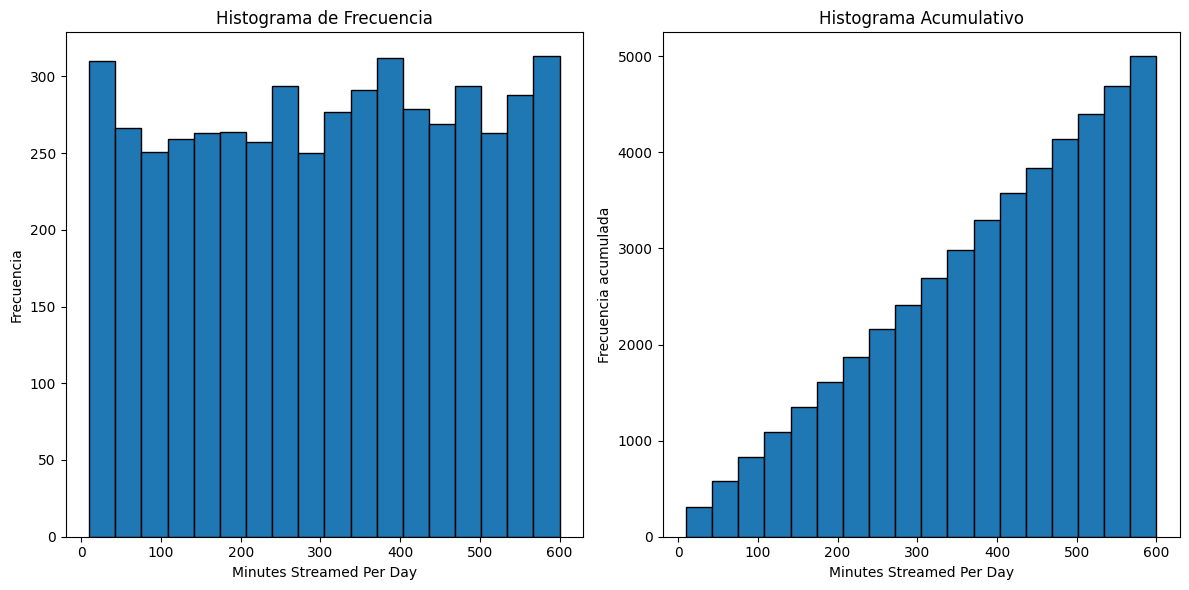

In [ ]:
plt.figure(figsize=(12, 6))

# Histograma simple
plt.subplot(1, 2, 1)
plt.hist(col, bins=18, edgecolor='black')
plt.title('Histograma de Frecuencia')
plt.xlabel('Minutes Streamed Per Day')
plt.ylabel('Frecuencia')

# Histograma acumulativo
plt.subplot(1, 2, 2)
plt.hist(col, bins=18, cumulative=True, edgecolor='black')
plt.title('Histograma Acumulativo')
plt.xlabel('Minutes Streamed Per Day')
plt.ylabel('Frecuencia acumulada')

plt.tight_layout()
plt.show()


**Paso 3. Algunas operaciones básicas con Dataframe**

In [ ]:
prob_menor_200 = (col < 200).mean()
print("Probabilidad de que 'Minutes Streamed Per Day' sea menor a 200: ", (round(prob_menor_200, 2)*100))


prob_mayor_200 = (col > 200).mean()
print("Probabilidad de que 'Minutes Streamed Per Day' sea mayor a 200: ", (round(prob_mayor_200, 2)*100))


Probabilidad de que 'Minutes Streamed Per Day' sea menor a 200:  31.0
Probabilidad de que 'Minutes Streamed Per Day' sea mayor a 200:  69.0


# **Punto 9**

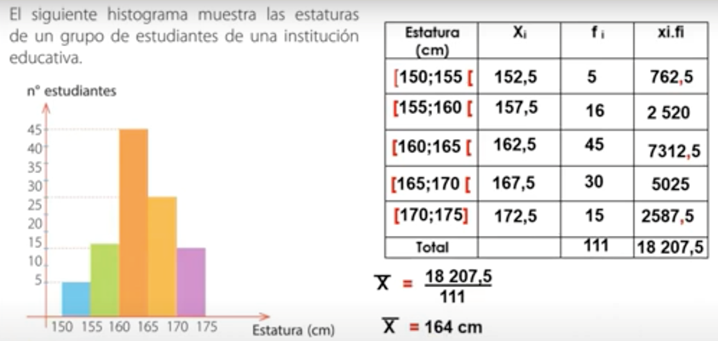

In [85]:
xi = [50, 150, 250, 350, 450, 550]
fi_50 = int((col<100).sum())
fi_150 = int(((col >= 100) & (col < 200)).sum())
fi_250 = int(((col >= 200) & (col < 300)).sum())
fi_350 = int(((col >= 300) & (col < 400)).sum())
fi_450 = int(((col >= 400) & (col < 500)).sum())
fi_550 = int(((col >= 500) & (col <= 600)).sum())

fi = [fi_50, fi_150, fi_250, fi_350, fi_450, fi_550]



xi_fi = []
for i in range(len(xi)):
  xi_fi.append(xi[i]*fi[i])

print(sum(xi_fi)/5000)

308.28


# **Punto 10**

In [88]:
col_1 = df['Repeat Song Rate (%)']

media = col_1.mean()                         # Media (promedio)
mediana = col_1.median()                     # Mediana
desviacion_std = col_1.std()                 # Desviación estándar
varianza = col_1.var()                       # Varianza
moda = col_1.mode()                          # Moda (puede haber varias)
minimo = col_1.min()                         # Valor mínimo
maximo = col_1.max()                         # Valor máximo
rango = maximo - minimo                      # Rango (max - min)

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_std)
print("Varianza:", varianza)
print("Moda:", moda.tolist())
print("Mínimo:", minimo)
print("Máximo:", maximo)
print("Rango:", rango)


Media: 42.391059999999996
Mediana: 41.96
Desviación estándar: 21.444121245310935
Varianza: 459.8503359835958
Moda: [16.59, 43.88, 53.51]
Mínimo: 5.0
Máximo: 79.99
Rango: 74.99
